# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
file_path = "data/adultData.csv"

# Load the data set into a DataFrame
df = pd.read_csv(file_path)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
#1. Basic Data Inspection
# Display the first few rows of the data
print(df.head())

# Get basic information about the data set
print(df.info())

# Get statistical summary of the numerical columns
print(df.describe())

    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.0  United-States         <=50K 

In [5]:
#2. Addressing Missing Value
# Check for missing values in each column
print(df.isnull().sum())

# Replace missing values with the mean for numerical columns (e.g., 'age' and 'hours-per-week')
df['age'].fillna(df['age'].mean(), inplace=True)
df['hours-per-week'].fillna(df['hours-per-week'].mean(), inplace=True)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [6]:
#3. Data Type Inspection
# Check data types of each column
print(df.dtypes)

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object


In [7]:
#4. Class Imbalance - for Classification Problem
# Check class distribution for 'income_binary'
print(df['income_binary'].value_counts())

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64


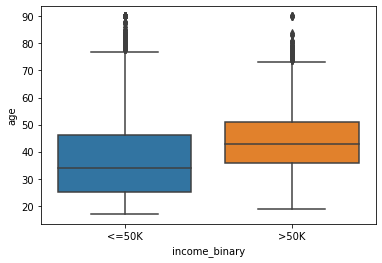

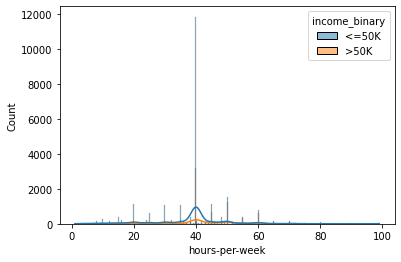

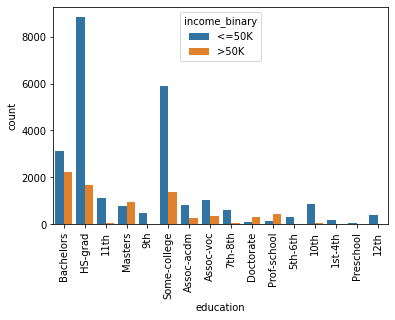

In [8]:
#5. Visualization Relationship
# Visualize the relationship between 'age' and 'income_binary'
sns.boxplot(x='income_binary', y='age', data=df)
plt.show()

# Visualize the distribution of 'hours-per-week' for each income group
sns.histplot(data=df, x='hours-per-week', hue='income_binary', kde=True)
plt.show()

# Visualize the distribution of 'education' for each income group
sns.countplot(data=df, x='education', hue='income_binary')
plt.xticks(rotation=90)
plt.show()

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [9]:
# YOUR CODE HERE

#1. Data Preparation and Feature Engineering
# Separate features and target label
X = df.drop('income_binary', axis=1)
y = df['income_binary']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check class distribution for 'income_binary'
print(y_train.value_counts())


<=50K    19778
>50K      6270
Name: income_binary, dtype: int64


In [10]:
#2. Addressing Class Imbalance

# Combine X_train and y_train into a single dataframe
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
minority_class = train_data[train_data['income_binary'] == '>50K']
majority_class = train_data[train_data['income_binary'] == '<=50K']

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(majority_class),  # Match the number of majority samples
                                 random_state=42)

# Combine oversampled minority class with majority class
oversampled_data = pd.concat([majority_class, minority_oversampled])

# Separate features (X) and target (y) after oversampling
X_train_balanced = oversampled_data.drop('income_binary', axis=1)
y_train_balanced = oversampled_data['income_binary']

# Check the class distribution after oversampling
print(y_train_balanced.value_counts())


>50K     19778
<=50K    19778
Name: income_binary, dtype: int64


In [11]:
#3. Model Selection and Evaluation

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model to the balanced training data
model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.8542914171656687
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.90      0.90      4942
        >50K       0.70      0.70      0.70      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.80      0.80      6513
weighted avg       0.85      0.85      0.85      6513

Confusion Matrix:
[[4469  473]
 [ 476 1095]]


In [12]:
#4. Model Improvement and Feature Selection

# Initialize the feature selector
selector = SelectFromModel(estimator=model, threshold='median')

# Fit the feature selector to the balanced training data
selector.fit(X_train_balanced, y_train_balanced)

# Transform the training and test data
X_train_selected = selector.transform(X_train_balanced)
X_test_selected = selector.transform(X_test)

# Re-fit the model on the selected features
model.fit(X_train_selected, y_train_balanced)

# Make predictions on the test data using the updated model
y_pred_selected = model.predict(X_test_selected)

# Evaluate the updated model
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Updated Model Accuracy:", accuracy_selected)

print("Updated Classification Report:")
print(classification_report(y_test, y_pred_selected))

print("Updated Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_selected))


Updated Model Accuracy: 0.8522954091816367
Updated Classification Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.90      0.90      4942
        >50K       0.69      0.70      0.69      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.80      0.80      6513
weighted avg       0.85      0.85      0.85      6513

Updated Confusion Matrix:
[[4458  484]
 [ 478 1093]]


Original Model Accuracy: 0.8542914171656687
Updated Model Accuracy: 0.8522954091816367


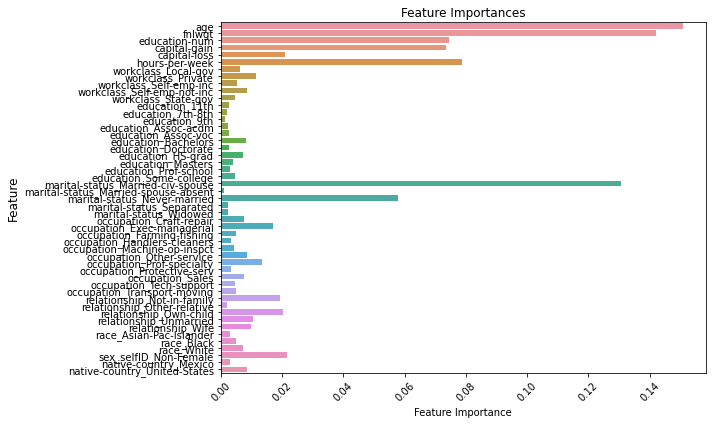

In [13]:
#5. Final Analyis and Conclusion

# Compare the performance of the original model and the updated model
print("Original Model Accuracy:", accuracy)
print("Updated Model Accuracy:", accuracy_selected)

# Analyze the feature importances 
feature_importances = model.feature_importances_
feature_names = X_encoded.columns[selector.get_support()]

# Visualize feature importances 
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature", fontsize=12)  
plt.title("Feature Importances")
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()